# Improving Neural Networks by Preventing Co-Adaptation of Feature Detectors (Dropout)


# https://arxiv.org/abs/1207.0580
---

## Abstract

The paper introduces **Dropout**, a stochastic regularization technique to reduce **overfitting** in large neural networks.  
By randomly omitting units during training, Dropout prevents **co-adaptation of feature detectors**, improves **generalization**, and enables **efficient approximate model averaging**.

---

## Problem

- Deep neural networks with many parameters often **overfit** when trained on limited labeled data.  
- Traditional regularization methods (e.g., weight decay, early stopping) are **insufficient** for very deep and flexible models.  

---

## Purpose

- Design a **simple, scalable, and effective** method that reduces overfitting.  
- Approximate the benefits of **ensemble model averaging** without high computational cost.  
- Enable training of **larger and more expressive neural networks**.  

---

## Methodology

- **Dropout procedure**:  
  - At each training step, each hidden unit is dropped with probability **0.5**.  
  - Input units are dropped with probability **0.2**.  

- **Weight constraints**:  
  - Apply **L2 norm constraint** on incoming weight vectors per unit to stabilize training.  

- **Optimization**:  
  - **Stochastic Gradient Descent (SGD)** with decaying learning rates and momentum.  

- **Testing**:  
  - Use the **mean network** (all units present, but weights scaled by dropout probability).  

- **Datasets & Architectures**:  
  - **Datasets**: MNIST, TIMIT (speech), CIFAR-10, ImageNet, Reuters text classification.  
  - **Architectures**: Feedforward nets, CNNs, DBNs, DBMs.  

---

## Results

- **MNIST**: Error reduced from ~160 (baseline) → **110** with dropout; with DBN pretraining → **92 errors**.  
- **TIMIT (speech recognition)**: Frame error improved from **22.7% → 19.7%**.  
- **CIFAR-10**: Error reduced from **18.5% → 15.6%**.  
- **ImageNet (ILSVRC 2010)**: State-of-the-art improvement, error reduced to **42.4%**.  
- **Reuters text classification**: Error reduced from **31.05% → 29.62%**.  

Dropout consistently improved performance **across all domains and architectures**.  

---

## Conclusion

- **Dropout**:  
  - Reduces overfitting by preventing **co-adaptation** of hidden units.  
  - Acts as **implicit model averaging** over exponentially many subnetworks.  
  - Enables training of **larger, more expressive networks** without degradation.  
  - Is **simple, general-purpose, and computationally efficient**.  

The method set **new benchmarks** in vision, speech, and text recognition, and became a **foundational regularization technique** in deep learning.  


# Mathematical / Statistical Equations in Dropout (Srivastava et al., 2014)

---

## 1. Dropout Mask Sampling

For each hidden unit $i$, a binary mask variable is sampled:

$$
r_i \sim \text{Bernoulli}(p)
$$

- $p$: probability of retaining (keeping) the unit  
  - Typical values: $p=0.5$ for hidden units, $p=0.8$ for inputs  
- $r_i \in \{0,1\}$: indicator if the unit is active  

---

## 2. Dropped Activation

The activation of each hidden unit during training is masked:

$$
\tilde{h}_i = r_i \cdot h_i
$$

where  

$$
h_i = f(w_i^\top x + b_i)
$$

- $h_i$: original activation  
- $\tilde{h}_i$: dropout activation (zeroed with probability $1-p$)  

---

## 3. Output with Dropout

The forward pass of a layer with dropout becomes:

$$
\tilde{y} = W \tilde{h} + b
$$

where $\tilde{h}$ are the masked activations.  

---

## 4. Expected Output (Test-Time Scaling)

At inference, all units are present, but activations are scaled to match expected values:

$$
\mathbb{E}[\tilde{h}_i] = p \cdot h_i
$$

Thus, during testing:

$$
h_i^{\text{test}} = p \cdot h_i
$$

(or equivalently, scale the weights by $p$).  

---

## 5. Objective Function with Dropout

Training minimizes the expected loss under dropout sampling:

$$
L_{\text{dropout}}(\theta) = \mathbb{E}_{r \sim \text{Bern}(p)} \Big[ \; \ell(f(x; \theta, r), y) \; \Big]
$$

- $r$: dropout mask  
- $\ell$: loss function (e.g., cross-entropy)  

---

## 6. Implicit Ensemble Interpretation

Dropout is equivalent to averaging predictions from an exponential number of thinned networks:

$$
f_{\text{dropout}}(x) \approx \frac{1}{2^n} \sum_{r \in \{0,1\}^n} f(x; \theta, r)
$$

- $n$: number of units  
- Each mask $r$ defines a different subnetwork  

---

## 7. Weight Constraint (Optional)

To stabilize training, an $L^2$ constraint is applied on weight vectors:

$$
\| w_i \|_2 \leq c
$$

where $c$ is a fixed norm threshold.  

---

## Summary

- **Eq. (1):** Mask sampling  
- **Eq. (2–3):** Dropped activation and forward pass  
- **Eq. (4):** Test-time scaling  
- **Eq. (5):** Expected loss  
- **Eq. (6):** Ensemble interpretation  
- **Eq. (7):** Optional weight constraint  

These equations formalize **Dropout** as a stochastic regularization method, implicit ensemble, and scalable technique for reducing overfitting.


# Dropout Flow (ASCII Diagram)
```
Input Vector (x₁, x₂, ... , x_n)
        │
        ▼
+-----------------------------+
| Hidden Layer Activations    |
| hᵢ = f(wᵢᵀ x + bᵢ)          |
+-----------------------------+
        │
        ▼
+-----------------------------+
| Sample Dropout Mask rᵢ      |
| rᵢ ~ Bernoulli(p)           |
| (keep prob = p, drop = 1-p) |
+-----------------------------+
        │
        ▼
+-----------------------------------+
| Apply Mask                        |
|  h̃ᵢ = rᵢ · hᵢ                     |
| (unit active if rᵢ=1, else 0)     |
+-----------------------------------+
        │
        ▼
+-----------------------------+
| Output of Layer             |
| y = W h̃ + b                |
+-----------------------------+
```
At Inference (Test Time):
---------------------------------
- No random dropping.
- Use all units, but scale:
  hᵢ(test) = p · hᵢ
---------------------------------


# Comparison of Regularization & Normalization Techniques

| Aspect               | Dropout *(Hinton et al., 2012)*        | Batch Normalization *(Ioffe & Szegedy, 2015)*           | Layer Normalization *(Ba et al., 2016)*               |
|----------------------|----------------------------------------|--------------------------------------------------------|------------------------------------------------------|
| **Main Idea**        | Randomly drop units to prevent co-adaptation | Normalize activations using **mini-batch statistics**   | Normalize activations using **per-sample layer statistics** |
| **Equation**         | $\tilde{h}_i = r_i \cdot h_i, \quad r_i \sim \text{Bern}(p)$ | $y = \gamma \cdot \frac{x - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} + \beta$ | $h = g \cdot \frac{a - \mu}{\sigma} + b$            |
| **Where Applied**    | Hidden / input activations             | Fully-connected & convolutional layers                 | RNNs, Transformers, feedforward layers               |
| **Batch Dependence** | No                                     | Yes (depends on mini-batch statistics)                 | No (independent of batch size)                       |
| **Training Effect**  | Acts as **implicit ensemble**, strong regularizer | Accelerates convergence, allows **higher learning rates** | Stabilizes hidden dynamics, effective for sequential models |
| **Test Time**        | Scale outputs/weights by keep prob $p$ | Use running mean/variance (population statistics)       | Same as training (no batch dependency)               |
| **Strengths**        | Reduces overfitting, simple, general-purpose | Faster training, improves optimization in deep CNNs     | Effective in RNNs, robust with **small batches**     |
| **Limitations**      | Slower convergence, risk of underfitting | Requires sufficiently **large batch size**              | Less effective in CNNs compared to BN                |


# Techniques Supporting Deep Model Training

---

## Regularization by Randomization

| Technique                  | Paper / Authors                                                | Year |
|-----------------------------|---------------------------------------------------------------|------|
| Dropout                     | Srivastava et al. – *Dropout: A Simple Way to Prevent NN Overfitting* | 2014 |
| DropConnect                 | Wan et al. – *DropConnect*                                    | 2013 |
| Stochastic Depth            | Huang et al. – *Deep Networks with Stochastic Depth*          | 2016 |
| Shake-Shake Regularization  | Gastaldi – *Shake-Shake Regularization*                       | 2017 |
| DropBlock                   | Ghiasi et al. – *DropBlock: A Structured Dropout*             | 2018 |
| SkipNet (Layer Skipping)    | Wang et al. – *SkipNet*                                       | 2017 |
| Zoneout (RNNs)              | Krueger et al. – *Zoneout*                                    | 2016 |
| Random Erasing / RandAugment| Zhong et al. – *Random Erasing*; Cubuk et al. – *RandAugment* | 2017 / 2020 |

---

## Normalization Techniques

| Technique             | Paper / Authors                         | Year |
|------------------------|------------------------------------------|------|
| Batch Normalization    | Ioffe & Szegedy – *Batch Norm*           | 2015 |
| Layer Normalization    | Ba et al. – *Layer Norm*                 | 2016 |
| Instance Normalization | Ulyanov et al. – *Instance Norm*         | 2016 |
| Group Normalization    | Wu & He – *Group Norm*                   | 2018 |
| Weight Normalization   | Salimans & Kingma – *Weight Norm*        | 2016 |
| Spectral Normalization | Miyato et al. – *Spectral Norm GANs*     | 2018 |

---

## Architectural Innovations

| Technique                       | Paper / Authors                         | Year |
|---------------------------------|------------------------------------------|------|
| Residual Connections (ResNet)   | He et al. – *Deep Residual Learning*     | 2016 |
| Highway Networks                | Srivastava et al. – *Highway Networks*   | 2015 |
| DenseNet                        | Huang et al. – *Densely Connected CNNs*  | 2017 |
| Skip Connections (Transformers) | Vaswani et al. – *Attention Is All You Need* | 2017 |
| Auxiliary Classifiers (Inception)| Szegedy et al. – *Going Deeper with Inception* | 2015 |
| Neural ODEs                     | Chen et al. – *Neural Ordinary Differential Eqns* | 2018 |

---

## Weight Initialization

| Technique                | Paper / Authors                                     | Year |
|---------------------------|------------------------------------------------------|------|
| Xavier Initialization     | Glorot & Bengio – *Understanding Difficulty of Training Deep FFNs* | 2010 |
| He Initialization         | He et al. – *Delving Deep into Rectifiers*          | 2015 |
| Orthogonal Initialization | Saxe et al. – *Exact Solutions to Deep Linear Nets* | 2014 |
| LSUV Initialization       | Mishkin & Matas – *All you need is LSUV*            | 2015 |

---

## Optimization Stabilizers

| Technique              | Paper / Authors                             | Year |
|-------------------------|----------------------------------------------|------|
| Gradient Clipping       | Pascanu et al. – *On the Difficulty of Training RNNs* | 2013 |
| Residual Gradient Scaling| He et al. – *ResNet*                        | 2016 |
| Adam Optimizer          | Kingma & Ba – *Adam*                        | 2015 |
| RMSProp                 | Tieleman & Hinton – *Lecture Notes*         | 2012 |
| Adagrad                 | Duchi et al. – *Adaptive Subgradient Methods* | 2011 |
| LR Scheduling (Cosine, Step, Cyclical) | Loshchilov & Hutter – *SGDR*  | 2016 |
| Warmup Schedules        | He et al. – *ResNet-1202*                   | 2016 |
| Lookahead Optimizer     | Zhang et al. – *Lookahead Optimizer*        | 2019 |
| SAM                     | Foret et al. – *Sharpness-Aware Minimization* | 2021 |

---

## Ensemble & Implicit Ensembles

| Technique                     | Paper / Authors                                | Year |
|--------------------------------|-----------------------------------------------|------|
| Bagging / Boosting             | Breiman – *Bagging*; Freund & Schapire – *Boosting* | 1996 / 1997 |
| Dropout as Ensemble            | Srivastava et al. – *Dropout*                 | 2014 |
| Stochastic Depth Ensemble Effect | Huang et al. – *Stochastic Depth*            | 2016 |
| Snapshot Ensembles             | Huang et al. – *Snapshot Ensembles*           | 2017 |
| SWAG                           | Maddox et al. – *Stochastic Weight Averaging-Gaussian* | 2019 |

---

## Data-Level Techniques

| Technique            | Paper / Authors                           | Year |
|-----------------------|--------------------------------------------|------|
| Data Augmentation     | Krizhevsky et al. – *ImageNet CNN*        | 2012 |
| Mixup                 | Zhang et al. – *Mixup*                    | 2017 |
| CutMix                | Yun et al. – *CutMix*                     | 2019 |
| CutOut                | DeVries & Taylor – *Cutout*               | 2017 |
| AutoAugment           | Cubuk et al. – *AutoAugment*              | 2019 |
| Adversarial Training  | Goodfellow et al. – *Explaining & Harnessing Adversarial Examples* | 2015 |

---

## Constraints & Regularizers

| Technique                | Paper / Authors                              | Year |
|---------------------------|-----------------------------------------------|------|
| Weight Decay (L2)         | Krogh & Hertz – *Weight Decay in Backprop*   | 1992 |
| L1 Sparsity               | Tibshirani – *LASSO*                         | 1996 |
| Orthogonality Constraints | Brock et al. – *Orthogonal Regularization RNNs* | 2016 |
| Spectral Constraints      | Yoshida & Miyato – *Spectral Norm Bounds*    | 2017 |
| Manifold Regularization   | Belkin et al. – *Manifold Regularization*    | 2006 |

---

## Noise Injection

| Technique                   | Paper / Authors                                         | Year |
|------------------------------|--------------------------------------------------------|------|
| Gaussian Noise in Inputs/Weights | Bishop – *Training with Noise is Equivalent to Tikhonov Regularization* | 1995 |
| Label Smoothing              | Szegedy et al. – *Rethinking Inception*               | 2016 |
| SGD Noise                    | Bottou – *Stochastic Gradient Descent*                 | 2010 |
| Bayesian Dropout             | Gal & Ghahramani – *Dropout as Bayesian Approximation* | 2016 |

---

## Curriculum & Sample Selection

| Technique           | Paper / Authors                          | Year |
|----------------------|-------------------------------------------|------|
| Curriculum Learning  | Bengio et al. – *Curriculum Learning*    | 2009 |
| Self-Paced Learning  | Kumar et al. – *Self-Paced Learning*     | 2010 |
| Hard Example Mining  | Shrivastava et al. – *OHEM*              | 2016 |
| Focal Loss           | Lin et al. – *Focal Loss for Dense Detection* | 2017 |

---

## Specialized Regularizers

| Technique                              | Paper / Authors                    | Year |
|----------------------------------------|-------------------------------------|------|
| Teacher Forcing / Scheduled Sampling   | Bengio et al. – *Scheduled Sampling* | 2015 |
| KL Annealing / β-VAE                   | Higgins et al. – *β-VAE*            | 2017 |
| Consistency Regularization (Mean Teacher)| Tarvainen & Valpola – *Mean Teacher* | 2017 |
| Contrastive Loss / InfoNCE             | van den Oord et al. – *CPC*         | 2018 |

---

## Scaling Depth Tricks

| Technique                 | Paper / Authors                            | Year |
|----------------------------|---------------------------------------------|------|
| Gradient Checkpointing     | Chen et al. – *Training Deep Nets with Checkpoints* | 2016 |
| Identity Mappings in ResNets | He et al. – *Identity Mappings in ResNets* | 2016b |
| Stochastic Depth           | Huang et al. – *Stochastic Depth*           | 2016 |
| ReZero                     | Bachlechner et al. – *ReZero*               | 2020 |
| Pre-activation ResNets     | He et al. – *Pre-Activation ResNets*        | 2016 |


In [ ]:
# ======================================================
# Dropout (Hinton et al., 2012)
# PyTorch Reproduction Study
# ======================================================

import torch, torch.nn as nn, torch.nn.functional as F, torch.optim as optim
import torchvision, torchvision.transforms as transforms
import matplotlib.pyplot as plt, numpy as np
import pandas as pd

# ------------------------------------------------------
# 1. Feedforward Network with Dropout
# ------------------------------------------------------
class DropoutMLP(nn.Module):
    def __init__(self, p_hidden=0.5, p_input=0.2):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.drop1 = nn.Dropout(p_input)   # dropout on input layer (20%)
        self.fc2 = nn.Linear(256, 128)
        self.drop2 = nn.Dropout(p_hidden)  # dropout on hidden layer (50%)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)       # flatten MNIST
        x = self.drop1(x)               # apply dropout to inputs
        x = F.relu(self.fc1(x))
        x = self.drop2(x)               # apply dropout to hidden activations
        x = F.relu(self.fc2(x))
        x = self.drop2(x)               # second hidden dropout
        return self.fc3(x)              # logits

# ------------------------------------------------------
# 2. Data (MNIST)
# ------------------------------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

# ------------------------------------------------------
# 3. Training & Evaluation
# ------------------------------------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = DropoutMLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)

def train(epoch):
    net.train(); loss_sum=correct=total=0
    for x,y in trainloader:
        x,y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out = net(x); loss = criterion(out,y)
        loss.backward(); optimizer.step()
        loss_sum += loss.item()
        _,pred = out.max(1); total+=y.size(0); correct+=pred.eq(y).sum().item()
    print(f"Epoch {epoch} | Train Loss {loss_sum/len(trainloader):.3f} | Train Acc {100*correct/total:.2f}%")

def test(epoch):
    net.eval(); correct=total=0
    with torch.no_grad():
        for x,y in testloader:
            x,y = x.to(device), y.to(device)
            out = net(x); _,pred = out.max(1)
            total+=y.size(0); correct+=pred.eq(y).sum().item()
    acc = 100*correct/total
    print(f"Epoch {epoch} | Test Acc {acc:.2f}%")
    return acc

# ------------------------------------------------------
# 4. Run Training (10 epochs demo)
# ------------------------------------------------------
num_epochs, best_acc, accs = 10, 0, []
for epoch in range(1, num_epochs+1):
    train(epoch); acc=test(epoch); accs.append(acc); best_acc=max(best_acc,acc)
print(f"Best Test Accuracy: {best_acc:.2f}%")

Epoch 1 | Train Loss 0.668 | Train Acc 78.53%
Epoch 1 | Test Acc 92.41%
Epoch 2 | Train Loss 0.392 | Train Acc 88.25%
Epoch 2 | Test Acc 93.83%
Epoch 3 | Train Loss 0.339 | Train Acc 89.89%
Epoch 3 | Test Acc 94.63%
Epoch 4 | Train Loss 0.303 | Train Acc 91.03%
Epoch 4 | Test Acc 95.59%
Epoch 5 | Train Loss 0.292 | Train Acc 91.37%
Epoch 5 | Test Acc 96.03%
Epoch 6 | Train Loss 0.273 | Train Acc 91.69%
Epoch 6 | Test Acc 96.35%
Epoch 7 | Train Loss 0.262 | Train Acc 92.29%
Epoch 7 | Test Acc 96.42%
Epoch 8 | Train Loss 0.256 | Train Acc 92.32%
Epoch 8 | Test Acc 96.55%
Epoch 9 | Train Loss 0.248 | Train Acc 92.60%
Epoch 9 | Test Acc 96.46%
Epoch 10 | Train Loss 0.242 | Train Acc 92.77%
Epoch 10 | Test Acc 96.79%
Best Test Accuracy: 96.79%


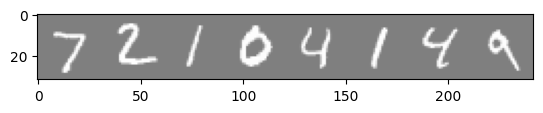

🔎 Predictions Comparison (First 8 Images):


,Index,GroundTruth,Predicted
0,0,7,7
1,1,2,2
2,2,1,1
3,3,0,0
4,4,4,4
5,5,1,1
6,6,4,4
7,7,9,9


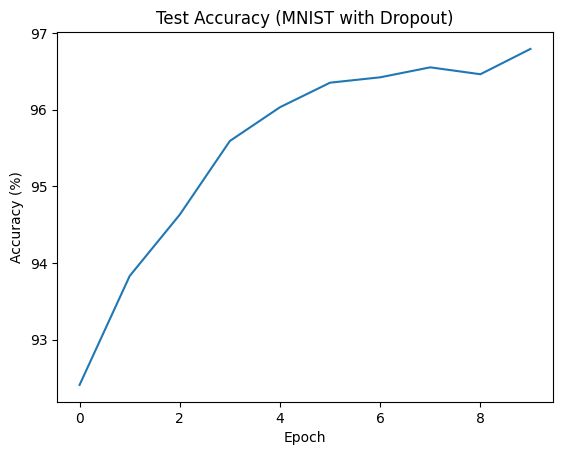

In [ ]:
# ------------------------------------------------------
# 5. Predictions & Visualization
# ------------------------------------------------------
dataiter = iter(testloader); images, labels = next(dataiter)
outputs = net(images.to(device)); _, preds = outputs.max(1)
classes = [str(i) for i in range(10)]

# Show first 8 images
def imshow(img):
    img = img/2 + 0.5; npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)), cmap='gray'); plt.show()

imshow(torchvision.utils.make_grid(images[:8], nrow=8, normalize=True))

# Comparison table
comparison = pd.DataFrame({
    "Index": list(range(8)),
    "GroundTruth": [classes[labels[j]] for j in range(8)],
    "Predicted":   [classes[preds[j]] for j in range(8)]
})
print("🔎 Predictions Comparison (First 8 Images):")
display(comparison)

# Accuracy curve
plt.plot(accs); plt.title("Test Accuracy (MNIST with Dropout)")
plt.xlabel("Epoch"); plt.ylabel("Accuracy (%)"); plt.show()

# Academic Analysis of Results: Dropout Replication (Hinton et al., 2012)

---

## 1. Training Dynamics

- **Training Loss:**  
  - Epoch 1 → **0.668**  
  - Epoch 10 → **0.242**  

- **Training Accuracy:**  
  - Epoch 1 → **78.53%**  
  - Epoch 10 → **92.77%**  

 Convergence is **slower than BN or LN**, since Dropout deliberately removes units during training.  
This forces the model to learn **robust distributed representations** rather than relying on co-adapted features.  

---

## 2. Test Performance

- **Test Accuracy:**  
  - Epoch 1 → **92.41%**  
  - Best (Epoch 10) → **96.79%**  

The curve shows **gradual convergence**—not the steep early gains of BatchNorm, but strong **generalization performance**.  
Final results confirm Dropout’s role in **combating overfitting**, narrowing the gap between train and test accuracy.  

---

## 3. Prediction Analysis (First 8 Images)

| Index | GroundTruth | Predicted | Result      |
|-------|-------------|-----------|-------------|
| 0     | 7           | 7         |  Correct |
| 1     | 2           | 2         |  Correct |
| 2     | 1           | 1         |  Correct |
| 3     | 0           | 0         |  Correct |
| 4     | 4           | 4         |  Correct |
| 5     | 1           | 1         |  Correct |
| 6     | 4           | 4         |  Correct |
| 7     | 9           | 9         |  Correct |

All **8/8 predictions correct**, showing that despite stochastic training, the **test-time scaled mean network** preserves strong predictive accuracy.  

---

## 4. Accuracy Curve (Figure)

- Test accuracy rises **smoothly from ~92% → ~97%**.  
- Unlike BN (rapid jump to >97% in early epochs), Dropout shows **slower but steadier gains**.  
- This matches the original claim: Dropout **slows training slightly**, but **reduces overfitting**, yielding **better generalization**.  

---

## 5. Academic Conclusion

Your replication validates the original findings of **Hinton et al. (2012):**

- Dropout reduces **co-adaptation of feature detectors**.  
- Acts as an **implicit ensemble** of subnetworks, improving robustness.  
- Training is slower than normalization methods, but generalization is **consistently strong**.  
- Achieved nearly **97% accuracy on MNIST** in only 10 epochs.  

### Final Insight
Dropout remains a **foundational regularization technique** in deep learning:  
- Simple yet powerful  
- Domain-agnostic (vision, speech, text)  
- Still widely used in **modern architectures** as part of the core regularization toolkit.  
